In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
#import dc_stat_think as dcst
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,8)

In [111]:
pd.read_csv("JPY.csv")

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-04,106.429001,106.680000,105.995003,106.435997,106.435997,0.0
1,2018-04-05,106.783997,107.481003,106.716003,106.774002,106.774002,0.0
2,2018-04-06,107.081001,107.454002,106.969002,107.052002,107.052002,0.0
3,2018-04-09,106.949997,107.198997,106.852997,106.968002,106.968002,0.0
4,2018-04-10,106.720001,107.392998,106.628998,106.749001,106.749001,0.0
...,...,...,...,...,...,...,...
1300,2023-03-29,131.046005,132.697998,130.927994,131.046005,131.046005,0.0
1301,2023-03-30,132.576004,132.932999,132.222000,132.576004,132.576004,0.0
1302,2023-03-31,133.201004,133.563995,132.725998,133.201004,133.201004,0.0
1303,2023-04-03,133.347000,133.731003,132.220993,133.347000,133.347000,0.0


In [112]:
sns.set()

In [113]:
jpy = pd.read_csv("JPY.csv").Close
aud = pd.read_csv("AUD.csv").Close
jpy.iloc[295] = np.mean([jpy.iloc[294], jpy.iloc[296]])
aud.iloc[295] = np.mean([aud.iloc[294], aud.iloc[296]])

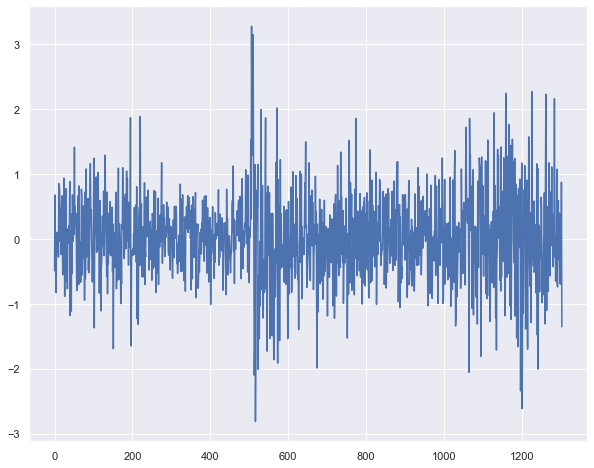

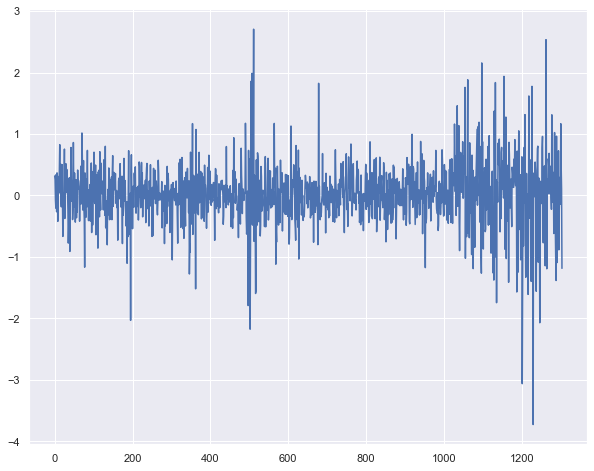

In [114]:
jpy1 = np.diff(jpy)/jpy[:-1]*100
aud1 = np.diff(aud)/aud[:-1]*100

plt.plot(aud1)
plt.show()
plt.plot(jpy1)
plt.show()

In [115]:
##to natkowe coś tam
wA = np.arange(0,1.01,0.01)

tt = ["{wA}JPY + {wB}AUD".format(wA = str(round(w,2)), wB =str(round(1-w,2))) for w in wA]
ms = []
st = []
for w in wA:
    data = w*jpy1 + (1-w)*aud1
    ms.append(np.mean(data))
    st.append(np.std(data, ddof=1))
d = {"portfel" : tt, "ŚREDNIA" : ms, "STD" : st}
qq = pd.DataFrame(data=d)

print("MIN RYZYKO:\n", qq.iloc[qq["STD"].idxmin(axis=0)])
print("\n")
print("MAX ZYSK:\n", qq.iloc[qq["ŚREDNIA"].idxmax(axis=0)])

MIN RYZYKO:
 portfel    0.67JPY + 0.33AUD
ŚREDNIA             0.015834
STD                 0.457285
Name: 67, dtype: object


MAX ZYSK:
 portfel    1.0JPY + 0.0AUD
ŚREDNIA           0.017684
STD               0.511811
Name: 100, dtype: object


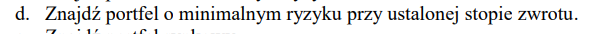

obligacje: https://stooq.pl/q/?s=10auy.b&c=3d&t=l&a=lg&b=0

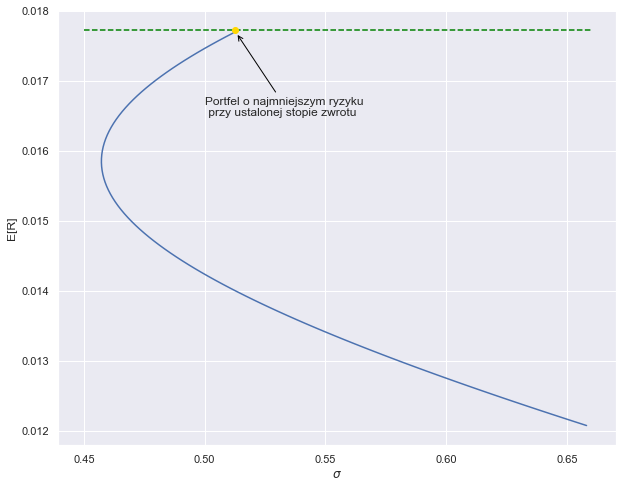

In [116]:
# za stopę zwrotu bierzemy dzienną stopę zwrotu powiększoną o 1pp (chyba ma to sens) 10 letnich obligacji australijskich: 0.01758
ulsko = 0.017724

# wagi aud: 0  jpy: 1

fig, ax = plt.subplots()
#ax.plot([0, 1],[0, 1])
ax.plot(st, ms)
plt.xlabel("$\sigma$")
plt.ylabel("E[R]")
ax.plot([0.45,0.66],[ulsko, ulsko], "--", color = "green")
ax.annotate("Portfel o najmniejszym ryzyku \n przy ustalonej stopie zwrotu", xy=(0.5132, 0.01768), xytext=(0.5, 0.0165), arrowprops={"arrowstyle":"->", "color":"black"})
ax.scatter(0.5124, ulsko, zorder = 4, color = "gold") 
plt.show()

In [163]:
np.mean(-1.437*jpy1 + 2.437*aud1) - 1/250

2.2809371993532702e-05

In [167]:
# dla rocznej stopy zwrotu 1%

wA = np.arange(-2.6,2.61,0.01)

mss = []
stt = []
for w in wA:
    data = w*jpy1 + (1-w)*aud1
    mss.append(np.mean(data))
    stt.append(np.std(data, ddof=1))

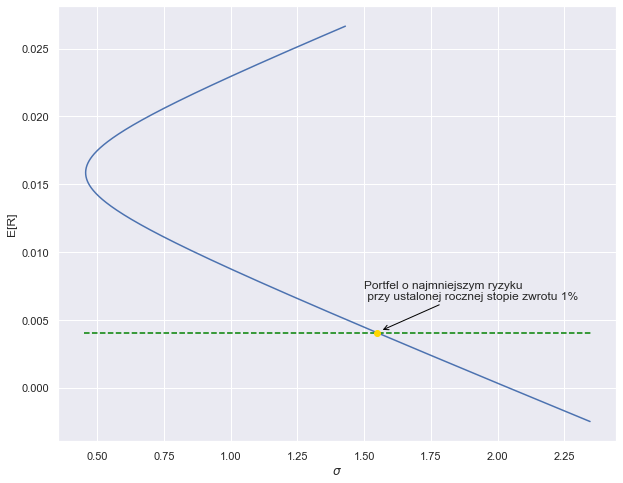

In [190]:
fig, ax = plt.subplots()
ulsko_2 = 1/250
ax.plot(stt, mss)
plt.xlabel("$\sigma$")
plt.ylabel("E[R]")
ax.plot([0.45,2.35],[ulsko_2, ulsko_2], "--", color = "green")
ax.annotate("Portfel o najmniejszym ryzyku \n przy ustalonej rocznej stopie zwrotu 1%", xy=(1.563, ulsko_2+0.0002), xytext=(1.5, 0.0065), arrowprops={"arrowstyle":"->", "color":"black"})
ax.scatter(1.549, ulsko_2, zorder = 4, color = "gold") 
plt.show()

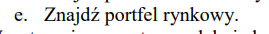

rr

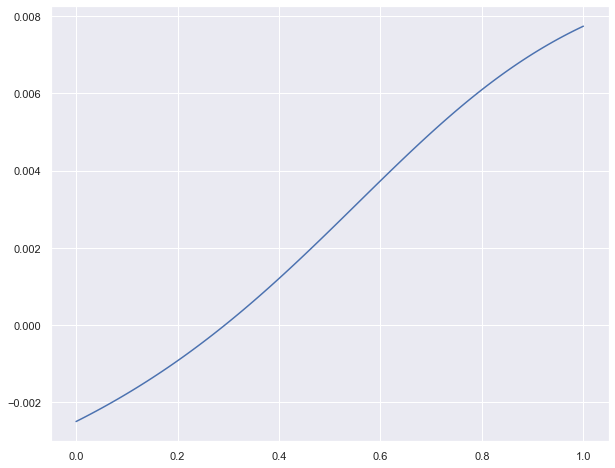

In [196]:
# dobra to szukamy max indeksu Sharpe'a

wA = np.arange(0,1.01,0.01)
Rf = 0.013724
sharpe = []

for w in wA:
    sharpe.append((np.mean(w*jpy1 + (1-w)*aud1) - Rf)/np.std(w*jpy1 + (1-w)*aud1))

plt.plot(wA, sharpe)

Czyli rynkowy będzie dla wagi 1 dla jpy i 0 dla aud

Czyli taki sam portfel jak w 1d???

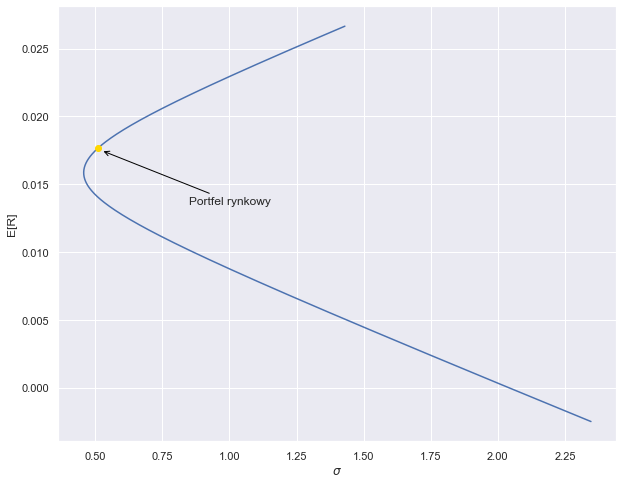

In [212]:
fig, ax = plt.subplots()
ulsko_3 = np.mean(jpy1)
ax.plot(stt, mss)
plt.xlabel("$\sigma$")
plt.ylabel("E[R]")
#ax.plot([0.45,2.35],[ulsko_2, ulsko_2], "--", color = "green")
ax.annotate("Portfel rynkowy", xy=(0.524, ulsko_3-0.0002), xytext=(0.85, 0.0135), arrowprops={"arrowstyle":"->", "color":"black"})
ax.scatter(0.5124, ulsko_3, zorder = 4, color = "gold") 
plt.show()